<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esercizio 09 – L’ Hello World per la Classificazione delle Immagini**

Lo **Step 1** consiste nell’importare, oltre la libreria numpy, anche la libreria TensorFlow e la matplotlib per il plottaggio di grafici che ci saranno utilissimi come vedremo in seguito:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lo **Step 2** consiste nell’importare il Dataset immagini da TensorFlow, ricordiamo che le immagini sono 28 x 28 pixel e sono del tipo monocromatico, cioè il pixel può assumere un valore da 0 a 255. Il set di dati MNIST caricato con tf.keras.datasets.mnist.load_data() è suddiviso in due parti:

-	Set di addestramento: 60.000 immagini e relative etichette.
-	Set di test: 10.000 immagini e relative etichette.

Come visto per i modelli di regressione, quando si sviluppa e si addestra un modello di machine learning, è utile avere tre distinti set di dati:

-	**Set di addestramento** (training set): Utilizzato per addestrare il modello.
-	**Set di validazione** (validation set): Utilizzato per valutare le prestazioni del modello durante l'addestramento e per effettuare l'ottimizzazione dei parametri del modello, prevenendo l'overfitting.
-	**Set di test** (test set): Utilizzato per valutare le prestazioni finali del modello dopo l'addestramento e l'ottimizzazione.

In questo caso ne bastano due, ovvero training e validation. Contestualmente all’importazione effettuiamo la Normalizziamo delle immagini dividendo per 255 il valore del pixel. Occorre considerare che devono essere importati due set di immagini, uno per l’apprendimento e l’altro per la validazione. Relativamente alla normalizzazione desidero precisare che questa è una pratica diffusissima nella Classificazione, infatti, quando si normalizzano i valori dei pixel da un intervallo di 0-255 a un intervallo di 0-1, i nuovi valori possono assumere qualsiasi valore decimale all'interno di questo intervallo, non solo 0 e 1. Ad esempio, un pixel con un valore originale di 128 diventerà 0.50196078 dopo la normalizzazione (128 / 255 ≈ 0.502). La normalizzazione dei dati aiuta a raggiungere una convergenza più rapida e stabile durante l'addestramento del modello, inoltre molte funzioni di attivazione (come la ReLU) funzionano meglio quando gli input sono normalizzati. Input con valori grandi possono portare a gradienti molto piccoli o molto grandi, causando problemi di convergenza. Infine, operare con valori più piccoli riduce il rischio di overflow numerico durante i calcoli, specialmente quando si lavora con modelli deep learning che coinvolgono molte operazioni matematiche complesse. Il codice quindi da scrivere per lo step 2 è:

In [ ]:
# Caricamento del dataset MNIST
data = tf.keras.datasets.mnist
(training_images, training_labels), (val_images, val_labels) = data.load_data()

# Normalizza i dati delle immagini in un intervallo tra 0 e 1
training_images = training_images / 255.0
val_images = val_images / 255.0

Lo **Step 3** è per la realizzazione di un Modello di rete neurale dove il Primo strato è da 20 neuroni con funzione di attivazione ReLU e con connessioni dense. Il Secondo strato da 10 neuroni con funzione di attivazione Softmax e con connessioni dense (le immagini di input sono del tipo 28 x 28 pixel).
Desidero far osservare che i layer densi (fully connected) richiedono input monodimensionali, per cui, prima di passare i dati a un layer denso, è necessario trasformare l'output del layer precedente in una forma che sia compatibile. Essendo l’immagine una matrice di valori 28x28 (array bidimensionale), occorrerà opportunamente modificare l’array da bidimensionale a monodimensionale, per fare questo si utilizza la funzione Flatten che riceve in input la matrice 28x28 e restituisce un array 784x1 (28x28=784), quindi l’array così trasformato diventa l’input per il layer successivo.
Infine ci facciamo stampare il sommario del modello così realizzato, per cui il codice sarà:

In [ ]:
# Definizione dei layer del modello
layer_1 = tf.keras.layers.Dense(20, activation=tf.nn.relu)
layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

# Creazione del modello
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    layer_1,
    layer_2])

# Mostra il sommario del modello
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Nello **Step 4** c’è la definizione della metodologia di ricerca del miglior apprendimento, pertanto fissiamo:
•	ottimizzatore: adam
•	funzione di perdita: sparse_ categorical_crossentropy
•	metrica: accuracy
per cui il codice e:

In [ ]:
# Compilazione del modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Nello **Step 5** c’è la Fase di Addestramento del modello con dataset per la fase di training e validazione. Viene fissato un numero di epoche di apprendimento pari a 20.
L’intero processo di apprendimento viene memorizzato in “history” per poi poter estrarre i valori della funzione di perdita e dell’errore per le successive analisi:


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4157 - accuracy: 0.8855 - val_loss: 0.2658 - val_accuracy: 0.9230
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2385 - accuracy: 0.9320 - val_loss: 0.2118 - val_accuracy: 0.9363
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1998 - accuracy: 0.9422 - val_loss: 0.1880 - val_accuracy: 0.9451
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1767 - accuracy: 0.9492 - val_loss: 0.1746 - val_accuracy: 0.9484
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1597 - accuracy: 0.9542 - val_loss: 0.1758 - val_accuracy: 0.9488
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1476 - accuracy: 0.9561 - val_loss: 0.1603 - val_accuracy: 0.9525
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1368 - accuracy: 0.9595 - val_loss: 0.1650 - val_accuracy:

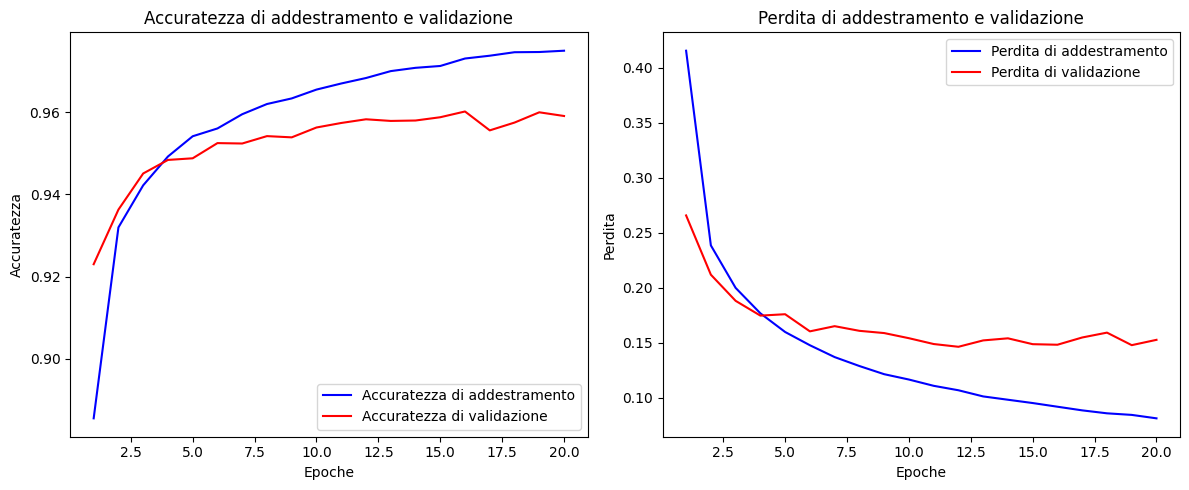

In [ ]:
# Addestramento del modello
history = model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))

# Valutazione del modello sui dati di validazione
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f'Accuratezza sui dati di test: {val_accuracy}')

# Plot dell'accuratezza e della perdita di addestramento e validazione
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# Plot dell'accuratezza
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Accuratezza di addestramento')
plt.plot(epochs, val_accuracy, 'r', label='Accuratezza di validazione')
plt.title('Accuratezza di addestramento e validazione')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()

# Plot della perdita
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Perdita di addestramento')
plt.plot(epochs, val_loss, 'r', label='Perdita di validazione')
plt.title('Perdita di addestramento e validazione')
plt.xlabel('Epoche')
plt.ylabel('Perdita')
plt.legend()

plt.tight_layout()
plt.show()



Infine nello **Step 6** eseguiamo un test di previsione su tutte le immagini del set di validazione e poi mostra i risultati per una sola immagine in particolare, quella indicata dall’indice i e viene poi stampato un grafico ad istogrammi per indicare la probabilità calcolata per ogni classe. Il codice in dettaglio è:

313/313 [==============================] - 1s 1ms/step
Predizioni per l'immagine 0: [4.0415191e-10 3.9259649e-13 4.2461997e-07 1.2940042e-05 1.7713050e-11
 2.6208536e-06 4.3882629e-19 9.9998111e-01 1.8248202e-06 9.5653820e-07]
Etichetta effettiva per l'immagine 0: 7
Classe prevista per l'immagine 0: 7


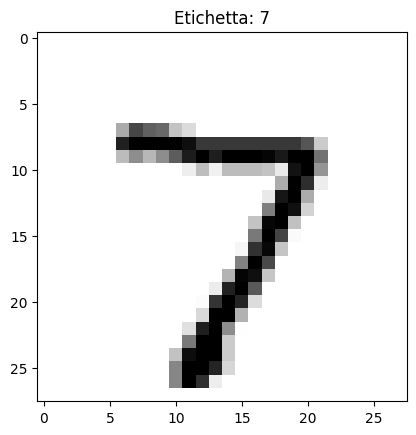

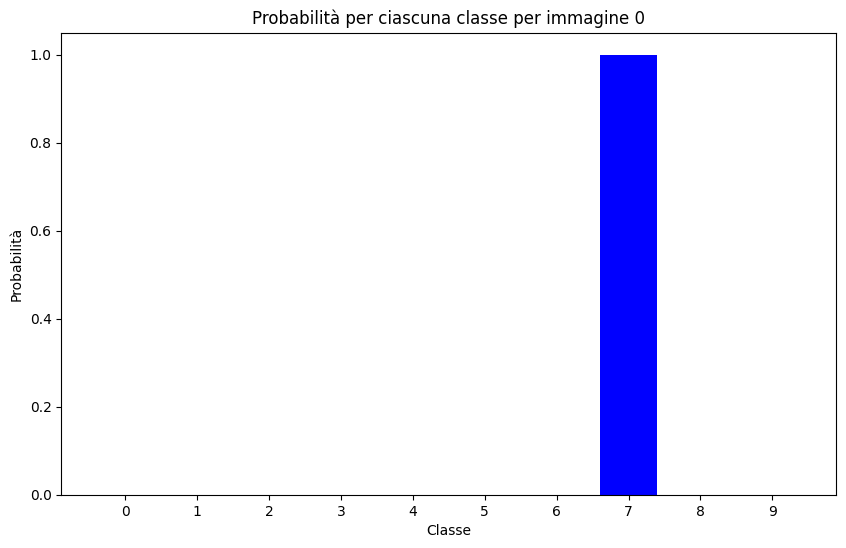

In [ ]:
# Il modello predice le probabilità per ciascuna immagine di validazione
classifications = model.predict(val_images)

# Viene stampata la lista delle probabilità per ciascuna classe per la prima immagine (se i = 0)
i = 0
predicted_label = np.argmax(classifications[i])
actual_label = val_labels[i]
print(f"Predizioni per l'immagine {i}: {classifications[i]}")
print(f"Etichetta effettiva per l'immagine {i}: {actual_label}")
print(f"Classe prevista per l'immagine {i}: {predicted_label}")

# Viene visualizzata l'immagine con l'etichetta reale
plt.imshow(val_images[i], cmap=plt.cm.binary)
plt.title(f"Etichetta: {actual_label}")
plt.show()

# Grafico ad istogrammi delle probabilità per ciascuna classe
plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 6)) crea una nuova figura con dimensioni specificate
plt.bar(range(10), classifications[i], color='blue')
# plt.bar(range(10), classifications[i], color='blue') crea un grafico ad istogrammi
# con le probabilità assegnate dal modello per ciascuna delle 10 classi
plt.xlabel('Classe')
plt.ylabel('Probabilità')
plt.title(f'Probabilità per ciascuna classe per immagine {i}')
# plt.xlabel('Classe'), plt.ylabel('Probabilità') e plt.title(...) aggiungono etichette e titolo al grafico.
plt.xticks(range(10))
# plt.xticks(range(10)) imposta le etichette dell'asse x per mostrare le classi da 0 a 9
plt.show()